In [3]:
pip install pandas numpy faker scikit-learn


In [4]:
import pandas as pd
import numpy as np
from faker import Faker
import random

# Initialize Faker
fake = Faker()
np.random.seed(42)

# Number of samples
n = 1000

# Helper function to simulate categories
def random_choice(prob_dict):
    return np.random.choice(list(prob_dict.keys()), p=list(prob_dict.values()))

# Data storage
data = []

for _ in range(n):
    age = np.random.randint(18, 60)

    # Mobile recharge frequency: Low, Medium, High
    mobile_recharge = random_choice({'Low': 0.3, 'Medium': 0.5, 'High': 0.2})

    # Bill payment timeliness: Yes/No
    bill_timely = random_choice({'Yes': 0.7, 'No': 0.3})

    # Freelance rating (1.0 to 5.0)
    freelance_rating = round(np.random.normal(4.2, 0.6), 1)
    freelance_rating = min(max(freelance_rating, 1.0), 5.0)  # clamp between 1 and 5

    # Location stability: changes per month (lower = more stable)
    location_changes = np.random.poisson(1.5)

    # Income level (approx in INR thousands)
    income = np.random.normal(25, 10)  # simulate low-income range
    income = max(5, round(income, 2))  # minimum income 5k

    # Target: Creditworthy (Yes/No) — based on weighted rule logic
    score = 0
    if mobile_recharge == 'High': score += 1
    if bill_timely == 'Yes': score += 1
    if freelance_rating > 4.0: score += 1
    if location_changes <= 2: score += 1
    if income > 20: score += 1

    creditworthy = 'Yes' if score >= 3 else 'No'

    # Add record
    data.append({
        'Age': age,
        'Mobile_Recharge_Level': mobile_recharge,
        'Bill_Paid_On_Time': bill_timely,
        'Freelance_Rating': freelance_rating,
        'Location_Changes_Per_Month': location_changes,
        'Monthly_Income_k': income,
        'Creditworthy': creditworthy
    })

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("synthetic_credit_scoring_data.csv", index=False)

# Preview
print(df.head())


   Age Mobile_Recharge_Level Bill_Paid_On_Time  Freelance_Rating  \
0   56                Medium               Yes               4.5   
1   28                  High               Yes               3.9   
2   29                Medium               Yes               4.2   
3   33                   Low               Yes               3.3   
4   35                  High                No               3.8   

   Location_Changes_Per_Month  Monthly_Income_k Creditworthy  
0                           1             38.68          Yes  
1                           0             19.75          Yes  
2                           1             20.72          Yes  
3                           4             39.87           No  
4                           0             34.47          Yes  


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("synthetic_credit_scoring_data.csv")


In [35]:
import pandas as pd
import numpy as np

# Load Dataset
df = pd.read_csv('synthetic_credit_scoring_data.csv')

# Clean Column Names (strip spaces)
df.columns = df.columns.str.strip()

# # 1. Introduce Missing Values (10% in specified columns)
# missing_cols = ['Age', 'Monthly income in thousands', 'Freelance Rating']
# for col in missing_cols:
#     df.loc[df.sample(frac=0.1, random_state=42).index, col] = np.nan

# 2. Add Outliers
# Extreme Age Values
df.loc[df.sample(frac=0.05, random_state=1).index, 'Age'] = 120
# Extremely High Location Changes
df.loc[df.sample(frac=0.04, random_state=2).index, 'Location changes per month'] = 20
# Extremely High Income
df.loc[df.sample(frac=0.03, random_state=3).index, 'Monthly income in thousands'] = 999

# 3. Typos in 'Mobile recharge level'
typo_map = {
    'high': 'hgh',
    'low': 'lw',
    'medium': 'medum'
}
df['Mobile_Recharge_Level'] = df['Mobile_Recharge_Level'].replace(typo_map)
# 5. Freelance Rating Ambiguity

# Out-of-Range Values
df.loc[df.sample(frac=0.02, random_state=5).index, 'Freelance Rating'] = 15

# # String Noise
# df.loc[df.sample(frac=0.01, random_state=6).index, 'Freelance Rating'] = 'good'

# Decimal Noise
df.loc[df.sample(frac=0.02, random_state=7).index, 'Freelance Rating'] = 4.567891234

# 4. Label Noise (Flip 7% of 'Creditworthy' labels)
mask = df.sample(frac=0.07, random_state=4).index
df.loc[mask, 'Creditworthy'] = df.loc[mask, 'Creditworthy'].apply(
    lambda x: 'No' if x == 'Yes' else 'Yes'
)

# Save the updated noisy dataset
df.to_csv('synthetic_credit_scoring_data_noisy.csv', index=False)

print("Noisy Dataset Created Successfully!")


Noisy Dataset Created Successfully!


In [48]:
import pandas as pd

# Load your noisy dataset
df = pd.read_csv('synthetic_credit_scoring_data_noisy.csv')

# Show count of missing values per column
print("Missing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Age                              0
Mobile_Recharge_Level            0
Bill_Paid_On_Time                0
Freelance_Rating                 0
Location_Changes_Per_Month       0
Monthly_Income_k                 0
Creditworthy                     0
Location changes per month     960
Monthly income in thousands    970
Freelance Rating               960
dtype: int64


In [49]:
import pandas as pd

# Load the dataset
df = pd.read_csv('synthetic_credit_scoring_data_noisy.csv')

# Drop the specified columns
df.drop(['Location changes per month', 'Monthly income in thousands', 'Freelance Rating'], axis=1, inplace=True)

# Save the updated dataset
df.to_csv('synthetic_credit_scoring_data_final.csv', index=False)

print("Columns deleted successfully! Updated dataset saved as 'synthetic_credit_scoring_data_final.csv'")


Columns deleted successfully! Updated dataset saved as 'synthetic_credit_scoring_data_final.csv'


In [50]:
import pandas as pd

# Load your noisy dataset
df = pd.read_csv('synthetic_credit_scoring_data_final.csv')

# Show count of missing values per column
print("Missing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Age                           0
Mobile_Recharge_Level         0
Bill_Paid_On_Time             0
Freelance_Rating              0
Location_Changes_Per_Month    0
Monthly_Income_k              0
Creditworthy                  0
dtype: int64


<ipython-input-51-ce4895c81c21>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Creditworthy', data=df, palette='Set2')


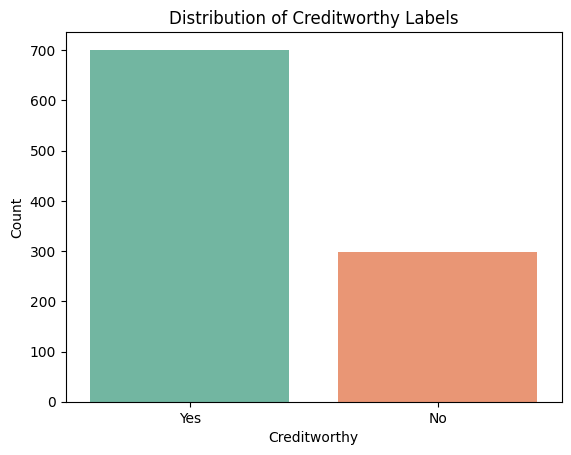

In [51]:
sns.countplot(x='Creditworthy', data=df, palette='Set2')
plt.title("Distribution of Creditworthy Labels")
plt.xlabel("Creditworthy")
plt.ylabel("Count")
plt.show()


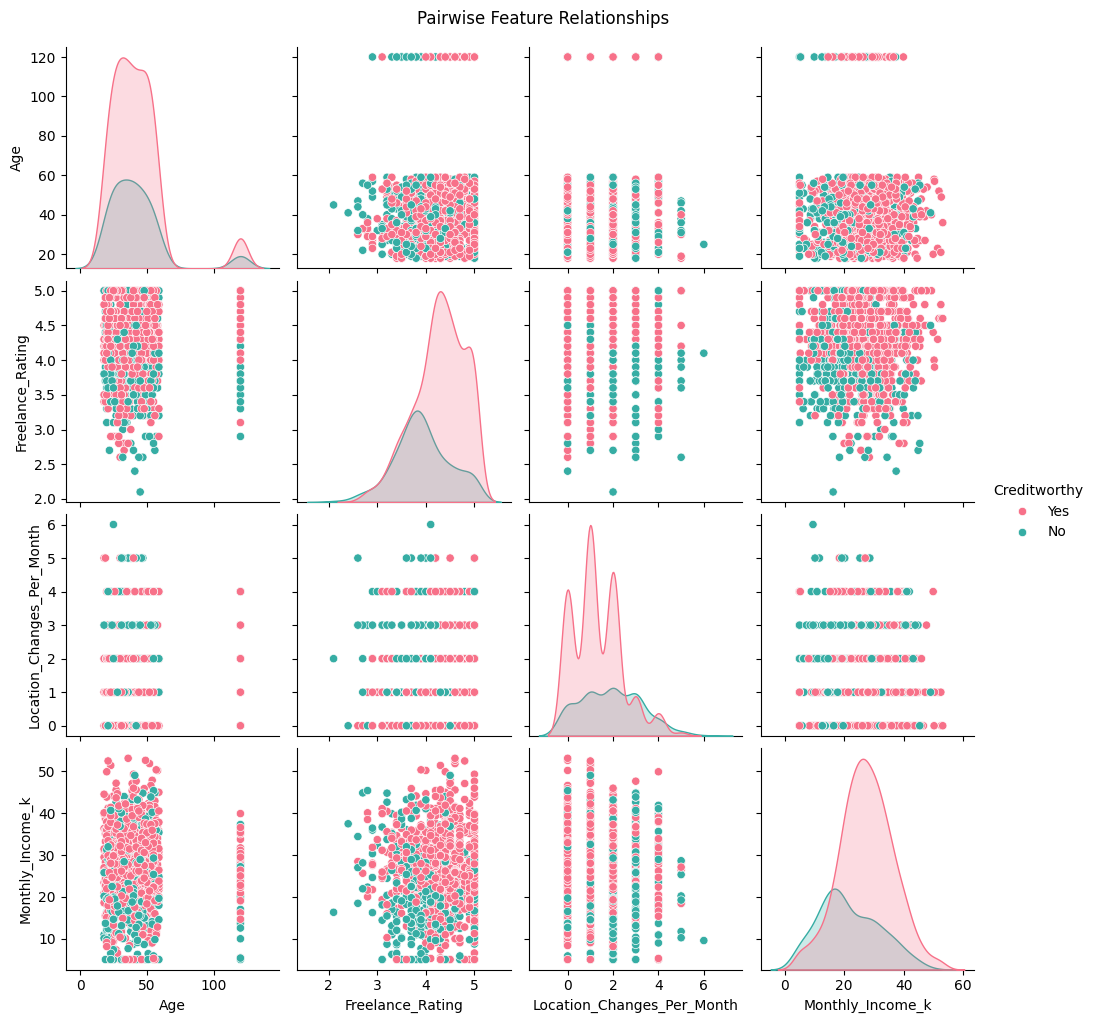

In [36]:
sns.pairplot(df, hue='Creditworthy', palette='husl', vars=[
    'Age', 'Freelance_Rating', 'Location_Changes_Per_Month', 'Monthly_Income_k'])
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


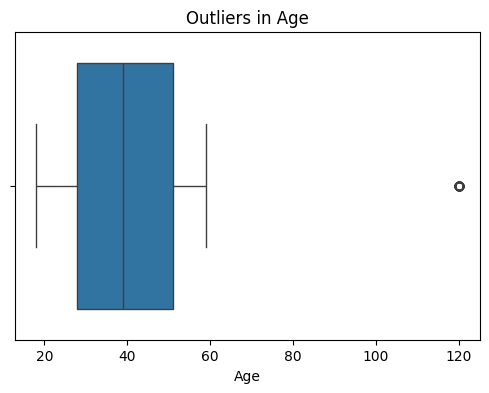

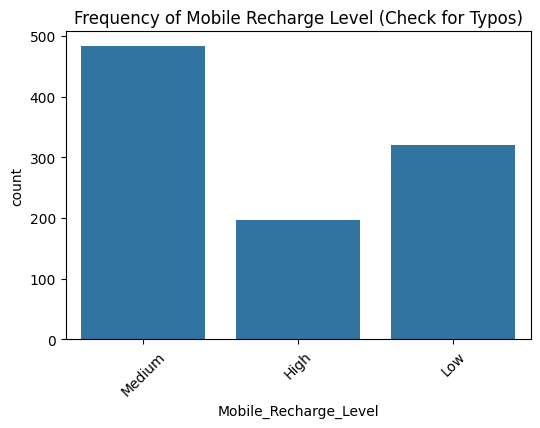

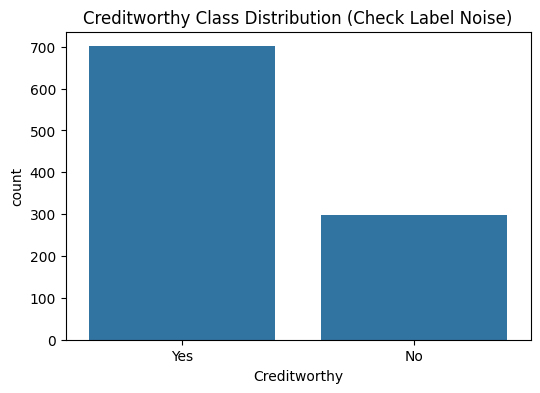

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the noisy dataset
df = pd.read_csv('synthetic_credit_scoring_data_final.csv')

# # 1. Missing Values Heatmap
# plt.figure(figsize=(10, 5))
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# plt.title('Missing Values Heatmap')
# plt.show()

# 2. Outliers Detection using Boxplot (for numerical columns)
numerical_cols = ['Age', 'Location changes per month', 'Monthly income in thousands']
for col in numerical_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Outliers in {col}')
        plt.show()

# 3. Visualizing Typos/Incorrect Categories in 'Mobile recharge level'
plt.figure(figsize=(6, 4))
sns.countplot(x='Mobile_Recharge_Level', data=df)
plt.title('Frequency of Mobile Recharge Level (Check for Typos)')
plt.xticks(rotation=45)
plt.show()

# 4. Visualizing Class Distribution (Possible Label Noise)
plt.figure(figsize=(6, 4))
sns.countplot(x='Creditworthy', data=df)
plt.title('Creditworthy Class Distribution (Check Label Noise)')
plt.show()


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/synthetic_credit_scoring_data_final.csv")

# Encode categorical variables
label_enc = LabelEncoder()
df['Mobile_Recharge_Level'] = label_enc.fit_transform(df['Mobile_Recharge_Level'])
df['Bill_Paid_On_Time'] = df['Bill_Paid_On_Time'].map({'Yes': 1, 'No': 0})
df['Creditworthy'] = df['Creditworthy'].map({'Yes': 1, 'No': 0})  # Target

# Features and label
X = df.drop('Creditworthy', axis=1)
y = df['Creditworthy']

# (Optional) Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [97]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [98]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [99]:
y_pred = rf_model.predict(X_test)


In [100]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")

# Classification Report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("🧱 Confusion Matrix:")
print(cm)


✅ Accuracy: 0.91
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        60
           1       0.93      0.94      0.93       140

    accuracy                           0.91       200
   macro avg       0.89      0.88      0.89       200
weighted avg       0.90      0.91      0.90       200

🧱 Confusion Matrix:
[[ 50  10]
 [  9 131]]


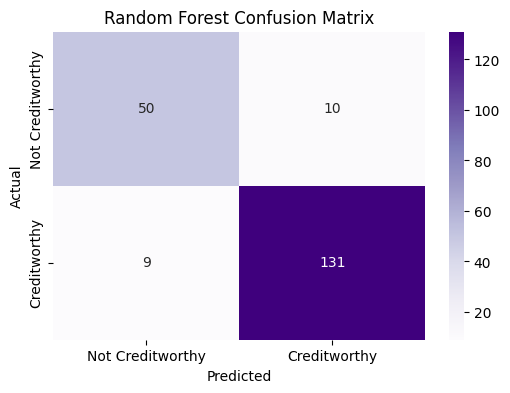

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Not Creditworthy', 'Creditworthy'], yticklabels=['Not Creditworthy', 'Creditworthy'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [102]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)


In [103]:
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [104]:
y_pred_lr = log_reg.predict(X_test)


In [105]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"✅ Logistic Regression Accuracy: {acc_lr:.2f}")

# Classification Report
print("📊 Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("🧱 Confusion Matrix:\n", cm_lr)


✅ Logistic Regression Accuracy: 0.84
📊 Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.81      0.63      0.71        60
           1       0.86      0.94      0.89       140

    accuracy                           0.84       200
   macro avg       0.83      0.78      0.80       200
weighted avg       0.84      0.84      0.84       200

🧱 Confusion Matrix:
 [[ 38  22]
 [  9 131]]


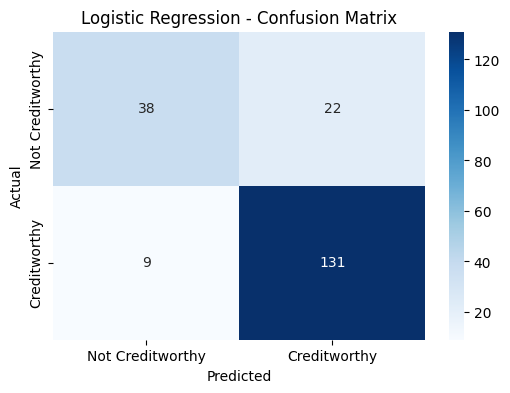

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Creditworthy', 'Creditworthy'],
            yticklabels=['Not Creditworthy', 'Creditworthy'])

plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [63]:
pip install xgboost


In [64]:
from xgboost import XGBClassifier

# Initialize model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


In [65]:
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:19:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [66]:
y_pred_xgb = xgb_model.predict(X_test)


In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"✅ XGBoost Accuracy: {acc_xgb:.2f}")

# Classification Report
print("📊 Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("🧱 Confusion Matrix:\n", cm_xgb)


✅ XGBoost Accuracy: 0.89
📊 Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        60
           1       0.93      0.91      0.92       140

    accuracy                           0.89       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.89      0.89      0.89       200

🧱 Confusion Matrix:
 [[ 51   9]
 [ 13 127]]


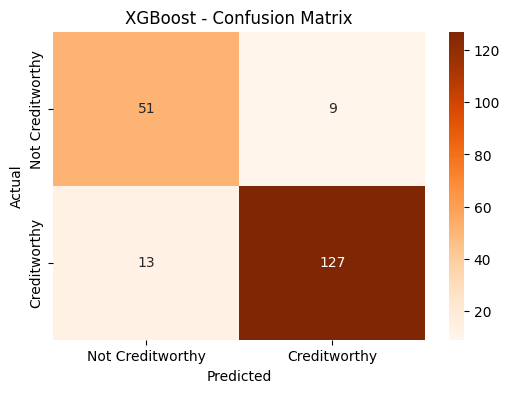

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Creditworthy', 'Creditworthy'],
            yticklabels=['Not Creditworthy', 'Creditworthy'])

plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [69]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, random_state=42)


In [70]:
svm_model.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [71]:
y_pred_svm = svm_model.predict(X_test)


In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"✅ SVM Accuracy: {acc_svm:.2f}")
print("📊 Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
print("🧱 Confusion Matrix:\n", cm_svm)


✅ SVM Accuracy: 0.88
📊 Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        60
           1       0.89      0.94      0.92       140

    accuracy                           0.88       200
   macro avg       0.87      0.84      0.85       200
weighted avg       0.88      0.88      0.88       200

🧱 Confusion Matrix:
 [[ 44  16]
 [  8 132]]


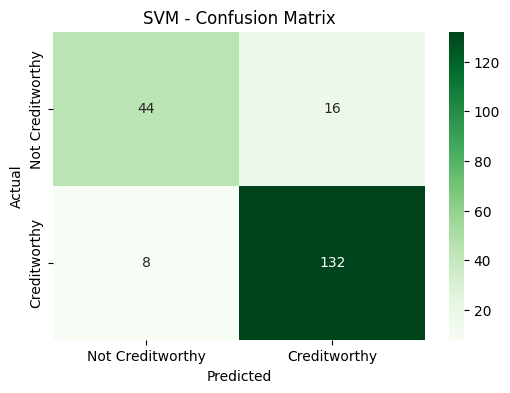

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Creditworthy', 'Creditworthy'],
            yticklabels=['Not Creditworthy', 'Creditworthy'])

plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Random Forest": y_pred,
    "Logistic Regression": y_pred_lr,
    "XGBoost": y_pred_xgb,
    "SVM": y_pred_svm
}

metrics = {}

for model_name, preds in models.items():
    metrics[model_name] = {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1 Score": f1_score(y_test, preds)
    }

import pandas as pd

metrics_df = pd.DataFrame(metrics).T  # transpose so models are rows
print(metrics_df)


                     Accuracy  Precision    Recall  F1 Score
Random Forest           0.905   0.929078  0.935714  0.932384
Logistic Regression     0.845   0.856209  0.935714  0.894198
XGBoost                 0.890   0.933824  0.907143  0.920290
SVM                     0.880   0.891892  0.942857  0.916667


<ipython-input-75-f67f5f184def>:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


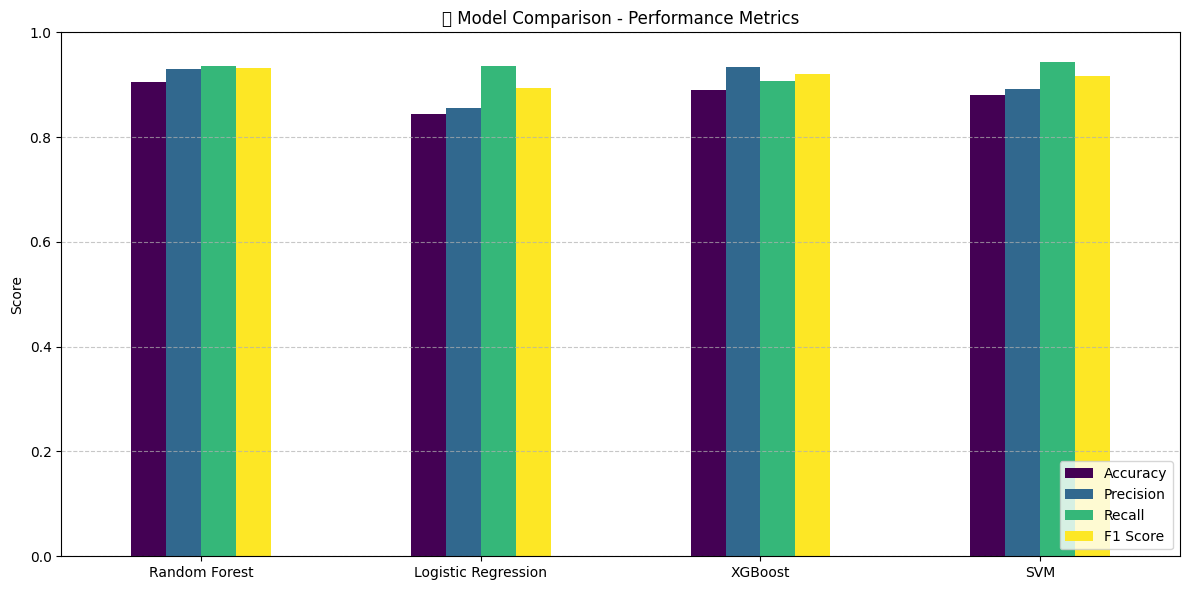

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
metrics_df.plot(kind='bar', figsize=(12,6), colormap='viridis')

plt.title("📊 Model Comparison - Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [76]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [77]:
# Assuming your models are already trained as:
# rf_model  -> Random Forest
# lr_model  -> Logistic Regression
# xgb_model -> XGBoost
# svm_model -> SVM

ensemble_model = VotingClassifier(estimators=[
    ('RandomForest', rf_model),
    ('LogisticRegression', log_reg),
    ('XGBoost', xgb_model),
    ('SVM', svm_model)
], voting='hard')  # 'hard' means Majority Voting

ensemble_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:19:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(random_state=42)),
                             ('LogisticRegression',
                              LogisticRegression(max_iter=1000, random_state=42,
                                                 solver='liblinear')),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=No...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('SVM', SVC(probability=True, random_state=42))])

In [78]:
y_pred_ensemble = ensemble_model.predict(X_test)


In [79]:
# Accuracy
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred_ensemble))

# Confusion Matrix
cm_ensemble=confusion_matrix(y_test, y_pred_ensemble)
print("Confusion Matrix:\n", cm_ensemble)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))


Ensemble Model Accuracy: 0.91
Confusion Matrix:
 [[ 51   9]
 [  9 131]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        60
           1       0.94      0.94      0.94       140

    accuracy                           0.91       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.91      0.91      0.91       200



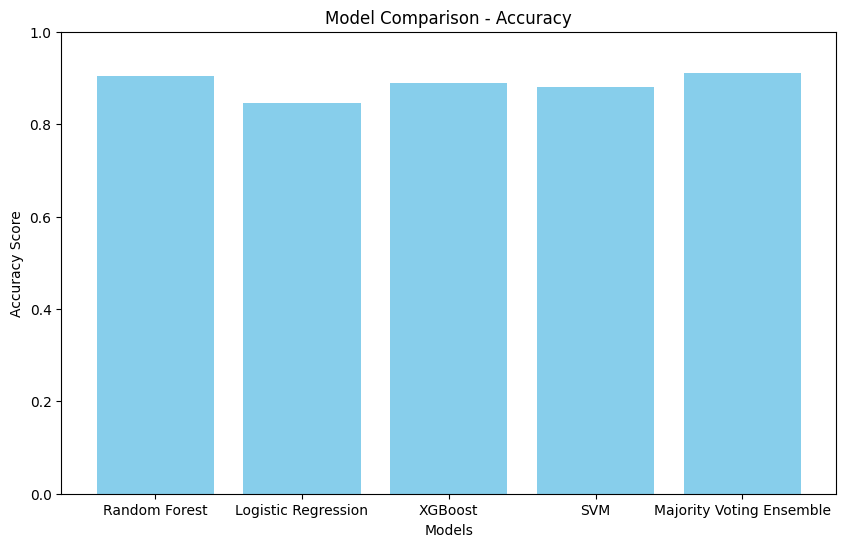

In [80]:
import matplotlib.pyplot as plt

# Accuracy of individual models
models = ['Random Forest', 'Logistic Regression', 'XGBoost', 'SVM', 'Majority Voting Ensemble']
accuracy_scores = [accuracy, acc_lr, acc_xgb, acc_svm, accuracy_score(y_test, y_pred_ensemble)]

plt.figure(figsize=(10,6))
plt.bar(models, accuracy_scores, color='skyblue')
plt.title('Model Comparison - Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()


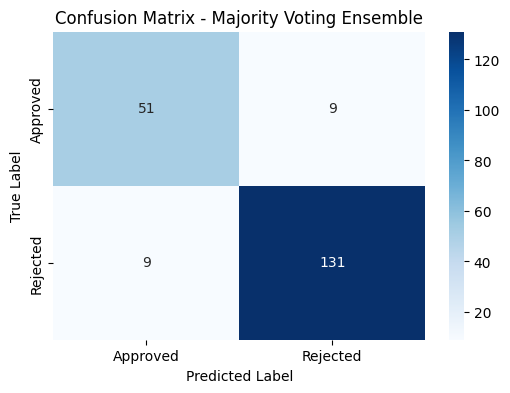

In [81]:
class_names = ['Approved', 'Rejected']  # change as per your dataset

plt.figure(figsize=(6,4))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Majority Voting Ensemble')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [82]:
from sklearn.metrics import roc_curve, auc

# Generate ROC curve for each model
# Plot it for RF, LR, XGB, SVM, Ensemble



In [83]:
voting='soft'


In [84]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('lr', log_reg),
        ('xgb', xgb_model),
        ('svm', svm_model)
    ],
    voting='soft'   # Change from 'hard' to 'soft'
)


In [85]:
voting_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:20:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000, random_state=42,
                                                 solver='liblinear')),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            ev...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('svm', SVC(probability=True, random_state=42))],
                 voting='soft')

In [86]:
y_pred = voting_model.predict(X_test)
y_prob = voting_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC


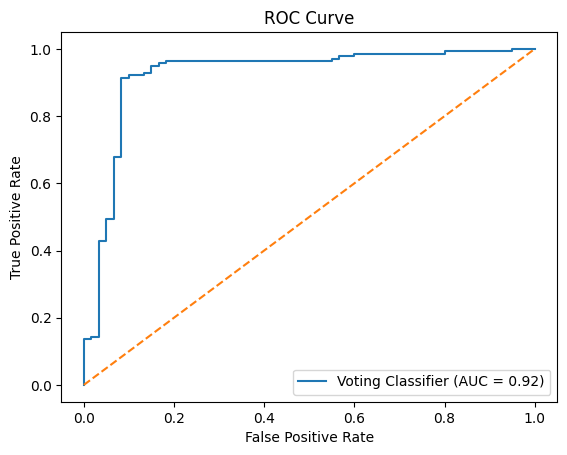

In [87]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Voting Classifier (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


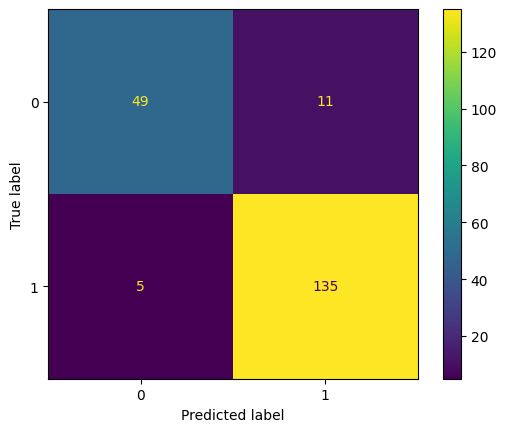

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
